In [1]:
import pandas as pd
from tools.core import GeneratedAppliance, Time, Building, Appliance_from_csv
import pickle

In [2]:
from nilm_metadata import get_appliance_types

In [3]:
from tools.core import GeneratedRefitAppliance, Building_from_csv

In [4]:
sample_rate = 8
dataset_time = Time("2014-04-01 00:00:00",'2014-07-20 00:00:00')

In [5]:
df = pd.read_csv(r"C:\annoticity-master (2)\train.csv")
df

,Date,Aggregate,fridge freezer,fan,television,washing machine,dishwasher,microwave,kettle
0,2014-04-01 00:00:00,140.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2014-04-01 00:00:08,136.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2014-04-01 00:00:16,138.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2014-04-01 00:00:24,128.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2014-04-01 00:00:32,139.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1187996,2014-07-19 23:59:28,159.0,84.0,0.0,0.0,0.0,0.0,0.0,0.0
1187997,2014-07-19 23:59:36,159.0,84.0,0.0,0.0,0.0,0.0,0.0,0.0
1187998,2014-07-19 23:59:44,158.0,83.0,0.0,0.0,0.0,0.0,0.0,0.0
1187999,2014-07-19 23:59:52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
building = Building_from_csv(1,dataset_time,sample_rate,r"C:\annoticity-master (2)\train.csv")

**********
fridge freezer
**********
**********
fan
**********
**********
television
**********
**********
washing machine
**********
**********
dishwasher
**********
**********
microwave
**********
**********
kettle
**********


In [7]:
with open(r"C:\Users\ASUS\Desktop\pnilm\data\oversample_time\fanaverage.pkl",'rb') as f:
    used_time = pickle.load(f)

In [5]:
building.appliance_lst[1].df.plot()

NameError: name 'used_time' is not defined

In [9]:
building.oversample(used_time,'fan',1)

<AxesSubplot:xlabel='Date'>

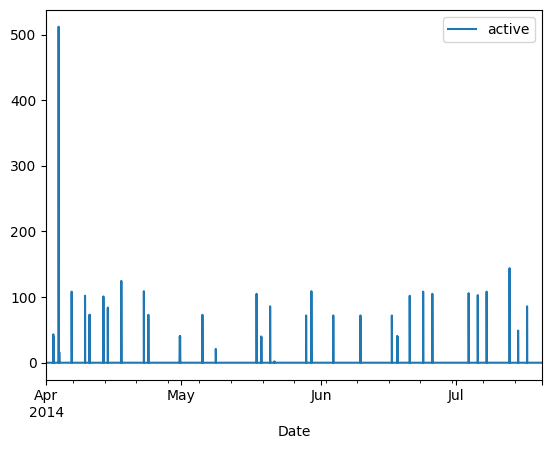

In [10]:
building.appliance_lst[1].df.plot()

In [11]:
building.to_dataset()

In [12]:
building.create_metadata()

In [13]:
building.create_metadata()
from convert_pilm import convert_pilm
convert_pilm(r'C:\Users\ASUS\Desktop\pnilm\dataset\metadata\building1','..//dataset','refit_fan_average.h5')

Loading house 1... 1 2 3 4 5 6 7 8 
Loaded metadata
['/building1/elec/meter1', '/building1/elec/meter2', '/building1/elec/meter3', '/building1/elec/meter4', '/building1/elec/meter5', '/building1/elec/meter6', '/building1/elec/meter7', '/building1/elec/meter8']
{'appliance': {'parent': None, 'min_on_duration': 20, 'min_off_duration': 20, 'type': 'appliance', 'n_ancestors': 0, 'categories': {}}, 'cold appliance': {'parent': 'appliance', 'min_on_duration': 20, 'min_off_duration': 20, 'type': 'cold appliance', 'n_ancestors': 1, 'categories': {'traditional': 'cold', 'size': 'large'}, 'distributions': {'rooms': [{'distribution_of_data': {'categories': ['kitchen', 'utility', 'basement', 'garage'], 'values': [0.5, 0.1, 0.1, 0.1]}, 'source': 'subjective', 'from_appliance_type': 'cold appliance', 'distance': 0}]}}, 'fridge': {'parent': 'cold appliance', 'min_on_duration': 20, 'min_off_duration': 20, 'type': 'fridge', 'n_ancestors': 2, 'categories': {'traditional': 'cold', 'size': 'large', 'elect

In [14]:
import os
import pickle
time_dictionary = {}
activation_path = r"C:\Users\ASUS\Desktop\pnilm\data\refit_data\used_time"
for i in os.listdir(activation_path):
    path = os.path.join(activation_path,i)
    with open(path, "rb") as f:
        time_dictionary[i] = pickle.load(f)

In [15]:
background = Appliance_from_csv("fridge",dataset_time.start,dataset_time.end,8,r"C:\Users\ASUS\Desktop\pnilm\data\refit_data\background_noise.csv", number_of_states=3)

In [16]:
import os
import pickle
time_dictionary = {}
activation_path = r"C:\Users\ASUS\Desktop\pnilm\data\refit_data\used_time"
for i in os.listdir(activation_path):
    path = os.path.join(activation_path,i)
    with open(path, "rb") as f:
        time_dictionary[i] = pickle.load(f)

In [17]:
fridge_path = r'C:\Users\ASUS\Desktop\最后一击\fridge'
df = pd.read_csv(os.path.join(fridge_path, "fridge"+str(0.2)+'.csv'))
df.index=df["Date"]
df = df.iloc[:,1]

In [18]:
rates=[0.2, 0.4, 0.6, 0.8, 1]

In [19]:
import datetime
str(datetime.datetime.strptime(time_dictionary["washing machine.pkl"][-1][0],"%Y-%m-%d %H:%M:%S")+ datetime.timedelta(0,8))

'2014-08-10 05:35:04'

In [21]:
fridge_path = r'C:\Users\ASUS\Desktop\最后一击\fridge'
Appliance_from_csv(fridge_path,dataset_time.start, dataset_time.end)

TypeError: __init__() missing 1 required positional argument: 'sample_rate'

In [22]:
fridge_path = r'C:\Users\ASUS\Desktop\最后一击\fridge'

for i, rate in enumerate(rates):
    refit7 = Appliance_from_csv('fridge', dataset_time.start, dataset_time.end, 8, os.path.join(fridge_path, "fridge"+str(rate)+'.csv'))
    refit1=GeneratedRefitAppliance("washing machine", dataset_time, 8, time_dictionary["washing machine.pkl"], rate)
    refit2=GeneratedRefitAppliance("television", dataset_time, 8, time_dictionary["tv.pkl"], rate)
    refit3=GeneratedRefitAppliance("kettle", dataset_time, 8, time_dictionary["kettle.pkl"], rate)
    refit4=GeneratedRefitAppliance("dishwasher", dataset_time, 8, time_dictionary['dishwasher.pkl'], rate)
    refit5=GeneratedRefitAppliance("toaster", dataset_time, 8, time_dictionary['toaster.pkl'], rate)
    refit6=GeneratedRefitAppliance("microwave", dataset_time, 8, time_dictionary['microwave.pkl'], rate)
    variable_name = "Building_"+str(rate)
    globals()[variable_name] = Building(i+1, dataset_time, sample_rate)
    globals()[variable_name].add_appliance(refit1)
    globals()[variable_name].add_appliance(refit2)
    globals()[variable_name].add_appliance(refit3)
    globals()[variable_name].add_appliance(refit4)
    globals()[variable_name].add_appliance(refit5)
    globals()[variable_name].add_appliance(refit6)
    globals()[variable_name].add_appliance(refit7)
    globals()[variable_name].to_dataset()
    globals()[variable_name].create_metadata()

ValueError: Must have equal len keys and value when setting with an ndarray

In [23]:
from convert_pilm import convert_pilm
convert_pilm('..//dataset//metadata','..//dataset','train_dataset1.h5')

Loading house 1... 1 2 3 4 5 6 7 8 
Loaded metadata


..//dataset//metadata\dataset.yaml not found.
..//dataset//metadata\meter_devices.yaml not found.


TypeError: 'NoneType' object does not support item assignment

In [ ]:
from __future__ import print_function, division
import time

from matplotlib import rcParams
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from six import iteritems

from nilmtk import DataSet, TimeFrame, MeterGroup, HDFDataStore
from nilmtk.legacy.disaggregate import CombinatorialOptimisation, FHMM
import nilmtk.utils

%matplotlib inline

In [ ]:
train = DataSet(r'test_refit2.h5')
test = DataSet(r'C:\Users\ASUS\Desktop\pnilm\data\experiment\refit_test.h5')

In [ ]:
building = 1
train_elec = train.buildings[5].elec
test_elec = test.buildings[1].elec

In [ ]:
def predict(clf, test_elec, sample_period, timezone):
    pred = {}
    gt= {}

    # "ac_type" varies according to the dataset used.
    # Make sure to use the correct ac_type before using the default parameters in this code.
    for i, chunk in enumerate(test_elec.mains().load(physical_quantity = 'power', ac_type = 'active', sample_period=sample_period)):
        chunk_drop_na = chunk.dropna()
        pred[i] = clf.disaggregate_chunk(chunk_drop_na)
        gt[i]={}

        for meter in test_elec.submeters().meters:
            # Only use the meters that we trained on (this saves time!)
            gt[i][meter] = next(meter.load(physical_quantity = 'power', ac_type = 'active', sample_period=sample_period))
        gt[i] = pd.DataFrame({k:v.squeeze() for k,v in iteritems(gt[i]) if len(v)}, index=next(iter(gt[i].values())).index).dropna()

    # If everything can fit in memory
    gt_overall = pd.concat(gt)
    gt_overall.index = gt_overall.index.droplevel()
    pred_overall = pd.concat(pred)
    pred_overall.index = pred_overall.index.droplevel()

    # Having the same order of columns
    # gt_overall = gt_overall[pred_overall.columns]
    return gt_overall, pred_overall
state_dict = {"washing machine":4,"television":2,"dishwasher":3, "microwave":2,"toaster":3,"kettle":2,"fridge":2}
classifiers = {'FHMM':FHMM(),"CO":CombinatorialOptimisation()}
predictions = {}
sample_period = 120
for clf_name, clf in classifiers.items():
    print("*"*20)
    print(clf_name)
    print("*" *20)
    # start = time.time()
    # Note that we have given the sample period to downsample the data to 1 minute.
    # If instead of top_5 we wanted to train on all appliance, we would write
    # fhmm.train(train_elec, sample_period=60)
    clf.train(train_elec, sample_period=sample_period, num_states_dict=state_dict)
    # end = time.time()
    # print("Runtime =", end-start, "seconds.")
    gt, predictions[clf_name] = predict(clf, test_elec, sample_period, train.metadata['timezone'])

In [ ]:
def compute_rmse(gt, pred):
    from sklearn.metrics import mean_squared_error
    rms_error = {}
    for appliance in gt.columns:
        rms_error[appliance] = np.sqrt(mean_squared_error(gt[appliance], pred[appliance]))
    return pd.Series(rms_error)

In [ ]:
rmse = {}
for clf_name in classifiers.keys():
    rmse[clf_name] = nilmtk.utils.compute_rmse(gt, predictions[clf_name])

rmse = pd.DataFrame(rmse)
rmse

In [ ]:
gt.columns=["fridge", "washine machine", 'dishwasher', 'television',"microwave","toaster","kettle"]
predictions["FHMM"].columns = ["washine machine", "television","kettle", "dishwasher", "toaster", "microwave","fridge"]
predictions["CO"].columns = ["washine machine", "television","kettle", "dishwasher", "toaster", "microwave","fridge"]

In [ ]:
FHMM = predictions["FHMM"].copy()
FHMM = FHMM[gt.columns]
CO = predictions["CO"].copy()
CO = CO[gt.columns]

In [ ]:
# mse

In [ ]:
FHMM[FHMM.values<=10] = 0
FHMM[FHMM.values>10]=1
CO[CO<=10]=0
CO[CO>10] = 1
gt2 = gt.copy()
gt2[gt2<=10]=0
gt2[gt2>10]=1
gt2 = gt2.astype(int)
CO = CO.astype(int)
FHMM = FHMM.astype(int)


In [ ]:
from sklearn.metrics import f1_score
# 遍历每一列，并计算MSE
f1_list = []
for col in CO.columns:
    mse = f1_score(gt2[col], CO[col])
    f1_list.append(mse)

# 打印f1值列表
print(f1_list)
print(sum(f1_list)/len(f1_list))

In [ ]:
#f1

In [ ]:
from sklearn.metrics import f1_score
# 遍历每一列，并计算MSE
f1_list = []
for col in CO.columns:
    mse = f1_score(gt2[col],CO[col])
    f1_list.append(mse)

# 打印f1值列表
print(f1_list)
print(sum(f1_list)/len(f1_list))

In [ ]:
# RMSE

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
gt2=scaler.fit_transform(gt)

In [ ]:

CO2 = scaler.transform(predictions["CO"].values.astype(int))
FHMM2 = scaler.transform(predictions["FHMM"].values.astype(int))

In [ ]:
error_lst = []
from sklearn.metrics import mean_squared_error
for i in range(7):
    error_lst.append(mean_squared_error(gt2[:,i],FHMM2[:,i]))
print(error_lst)
print(sum(error_lst)/len(error_lst))

In [ ]:
error_lst

In [ ]:
# 初始化一个空列表，用于存储MSE值
from sklearn.metrics import mean_squared_error
mse_list = []

# 遍历每一列，并计算MSE
for col in CO:
    mse = mean_squared_error(CO, gt)
    mse_list.append(mse)

# 打印MSE值列表
print(mse_list)